# Plot

In [ ]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm

delphesDir = os.path.abspath("../MG5/Delphes")
os.environ['ROOT_INCLUDE_PATH'] = os.path.join(delphesDir,"external")

import ROOT

ROOT.gSystem.Load(os.path.join(delphesDir,"libDelphes.so"))

ROOT.gInterpreter.Declare('#include "classes/SortableObject.h"')
ROOT.gInterpreter.Declare('#include "classes/DelphesClasses.h"')
ROOT.gInterpreter.Declare('#include "external/ExRootAnalysis/ExRootTreeReader.h"')

import sys
sys.path.append('../recastCode')
from helper import getAlpha,getIP2D,getTheta2D,getJetTracks,getSigmaD0,getD0

plt.style.use('fivethirtyeight') #Set style
plt.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu']

colors = sns.color_palette('Paired')

### Load Recast Data

In [ ]:
inputFiles = ['../pp2ZH/Events/run_01/ctau_1mm_delphes_events.root','../pp2ZH/Events/run_03/ctau_100mm_delphes_events.root','../pp2ZH/Events/run_02/ctau_1000mm_delphes_events.root']
filesDict = {float(inputFile.split('ctau_')[1].split('mm')[0]) : inputFile for inputFile in inputFiles}

In [3]:
d0 = {ct : [] for ct in filesDict}
sigmaD0 = {ct : [] for ct in filesDict}

for ct,inputFile in filesDict.items():
    f = ROOT.TFile(inputFile,'read')
    tree = f.Get("Delphes")
    nevts = tree.GetEntries()
    nevts = 5000

    for ievt in range(nevts):
        tree.GetEntry(ievt)   
        weightPB = tree.Event.At(0).Weight/nevts
        jets = tree.Jet
        tracks = tree.Track        

        for j in jets:
            if j.PT < 35.0:
                continue
            if abs(j.Eta) > 2.4:
                continue
            jet_tracks = getJetTracks(j,tracks)
            if len(jet_tracks) == 0:
                continue
            for track in jet_tracks:
                d0[ct].append(getD0(track))
                sigmaD0[ct].append(getSigmaD0(track))
            
    f.Close()

            

### Plot Distributions

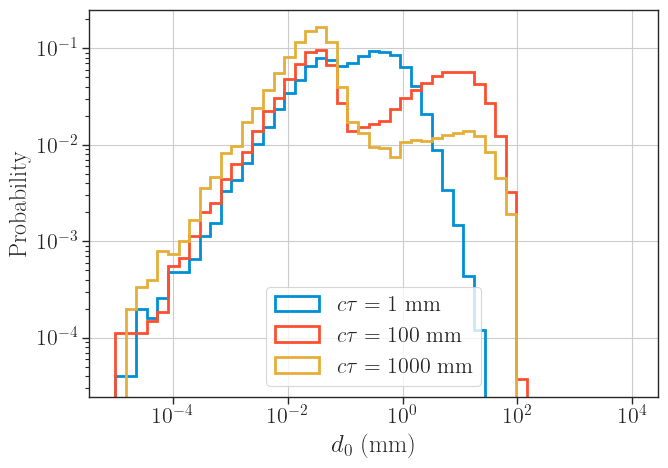

In [4]:
colors = sns.color_palette('deep')
fig = plt.figure(figsize=(7,5))
for ct,d0L in d0.items():
    h1,_,_ = plt.hist(d0L,histtype='step',linewidth=2,bins=np.logspace(-5,4,50),density=False,weights=[1.0/len(d0L)]*len(d0L),label=r'$c\tau = %1.0f$ mm'%ct)

plt.legend()
plt.yscale('log')
plt.xscale('log')
# plt.ylim(1e-2,10)
# plt.xlim(-1.5,3.0)
plt.grid()

plt.xlabel(r'$d_{0}$ (mm)',fontsize=18)
plt.ylabel('Probability')

plt.tight_layout()
plt.show()

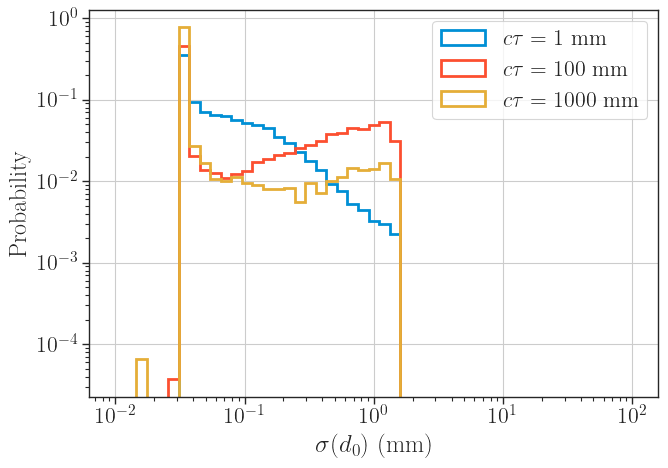

In [5]:
colors = sns.color_palette('deep')
fig = plt.figure(figsize=(7,5))
for ct,d0L in sigmaD0.items():
    h1,_,_ = plt.hist(d0L,histtype='step',linewidth=2,bins=np.logspace(-2,2,50),density=False,weights=[1.0/len(d0L)]*len(d0L),label=r'$c\tau = %1.0f$ mm'%ct)

plt.legend()
plt.yscale('log')
plt.xscale('log')
# plt.ylim(1e-2,10)
# plt.xlim(-1.5,3.0)
plt.grid()

plt.xlabel(r'$\sigma(d_{0})$ (mm)',fontsize=18)
plt.ylabel('Probability')

plt.tight_layout()
plt.show()

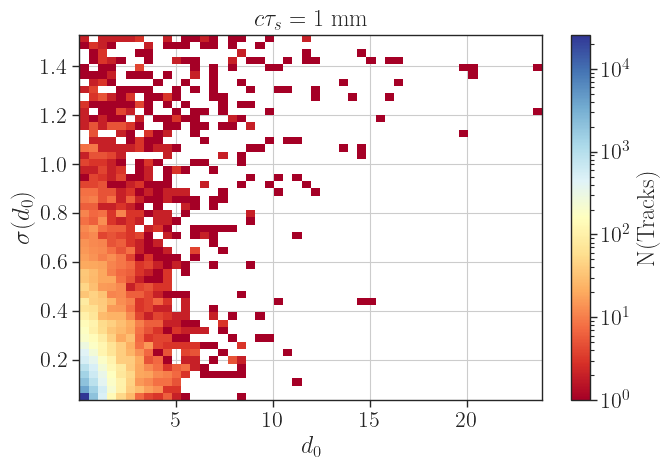

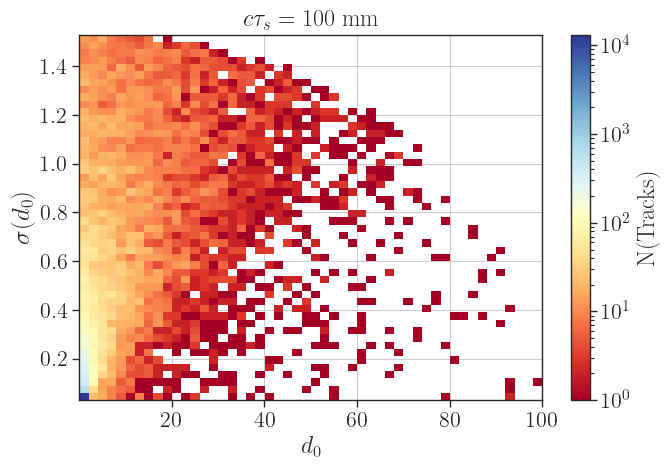

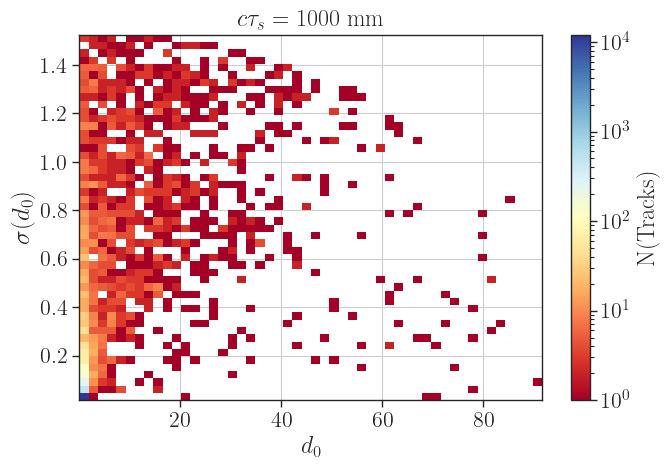

In [6]:
for ct,d0L in d0.items():
    fig = plt.figure(figsize=(7,5))
    plt.hist2d(d0L,sigmaD0[ct],bins=50,norm=LogNorm(),cmap=cm)

    # plt.legend()
    # plt.yscale('log')
    # plt.ylim(1e-2,10)
    # plt.xlim(-1.5,3.0)
    plt.grid()

    plt.ylabel(r'$\sigma(d_{0})$',fontsize=18)
    plt.xlabel(r'$d_0$')
    plt.title(r'$c\tau_s = %1.0f$ mm' %ct)
    plt.colorbar(label='N(Tracks)')
    plt.tight_layout()
    plt.show()